In [1]:
# ============================================
# Glucose Level Prediction using Linear Regression
# ============================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ Load Dataset

df = pd.read_csv("C:/Users/soniy/Downloads/glucose_data.csv")



First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
d

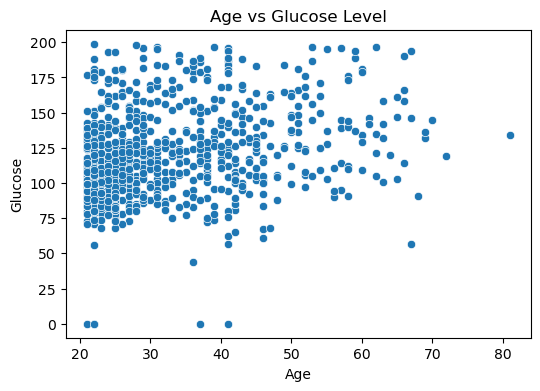

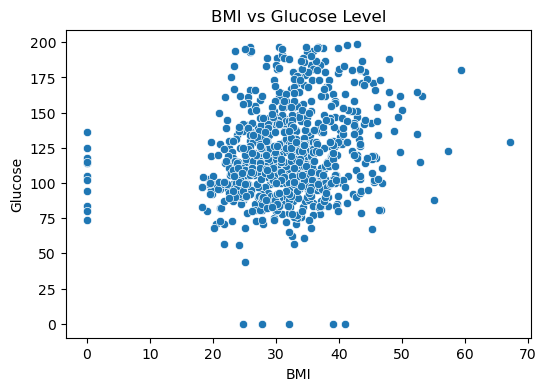

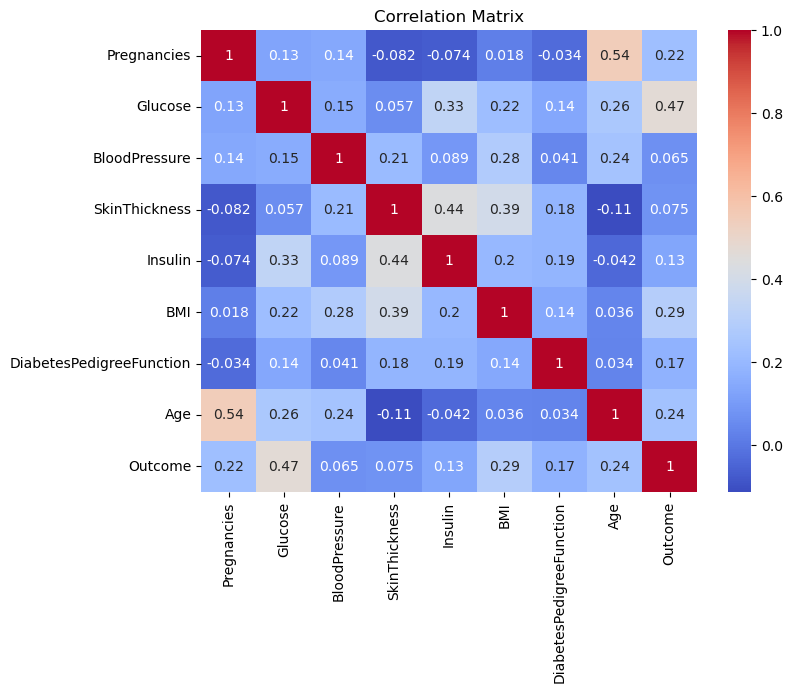

In [2]:
print("First 5 rows:")
print(df.head())

# 3️⃣ Data Cleaning
print("\nMissing Values:\n", df.isnull().sum())

df = df.dropna()

# 4️⃣ Exploratory Data Analysis

# Age vs Glucose
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'], y=df['Glucose'])
plt.title("Age vs Glucose Level")
plt.show()

# BMI vs Glucose
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['BMI'], y=df['Glucose'])
plt.title("BMI vs Glucose Level")
plt.show()

# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [5]:
# 5️⃣ Define Features and Target

X = df[['Age', 'BMI', 'BloodPressure', 
        'Insulin', 'SkinThickness', 'Pregnancies']]

y = df['Glucose']

# Add constant for intercept
X = sm.add_constant(X)

In [7]:
# 6️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Build Regression Model
model = sm.OLS(y_train, X_train).fit()

# 8️⃣ Model Summary
print(model.summary())

# 9️⃣ Predictions
y_pred = model.predict(X_test)

# 🔟 Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     32.51
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           5.19e-34
Time:                        15:53:53   Log-Likelihood:                -2913.8
No. Observations:                 614   AIC:                             5842.
Df Residuals:                     607   BIC:                             5873.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            66.5409      6.339     10.496

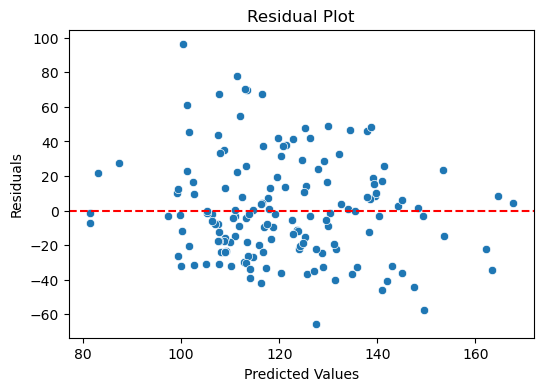

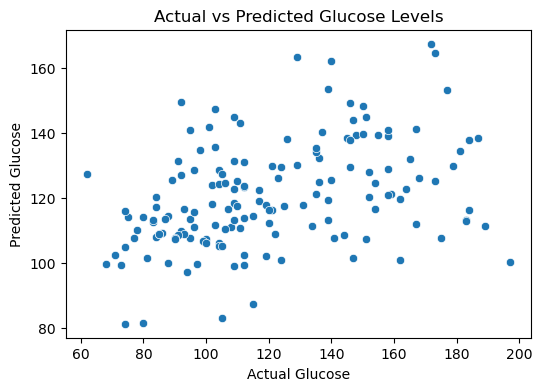


Project Completed Successfully.


In [9]:
# 1️⃣1️⃣ Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 1️⃣2️⃣ Actual vs Predicted Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("Actual vs Predicted Glucose Levels")
plt.show()

print("\nProject Completed Successfully.")